In [1]:
import pandas as pd
import seaborn as sns

In [2]:
true = pd.read_csv('data/True.csv')
fake = pd.read_csv('data/Fake.csv')

true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31/12/17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29/12/17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31/12/17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30/12/17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29/12/17


In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31/12/17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31/12/17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30/12/17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29/12/17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25/12/17


In [4]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22/8/17
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22/8/17
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22/8/17
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22/8/17
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22/8/17


In [5]:
fake.tail()

,title,text,subject,date
23445,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16/1/16
23446,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16/1/16
23447,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15/1/16
23448,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14/1/16
23449,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12/1/16


In [6]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
true['label'] = 1
fake['label'] = 0

# Slicing for all fake and true dataset contents
frames = [true.loc[:][:], fake.loc[:][:]]

# Combining dataset into 1
df = pd.concat(frames)
df.tail()

,title,text,subject,date,label
23445,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16/1/16,0
23446,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16/1/16,0
23447,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15/1/16,0
23448,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14/1/16,0
23449,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12/1/16,0


In [9]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31/12/17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29/12/17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31/12/17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30/12/17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29/12/17,1


<AxesSubplot:xlabel='label', ylabel='count'>

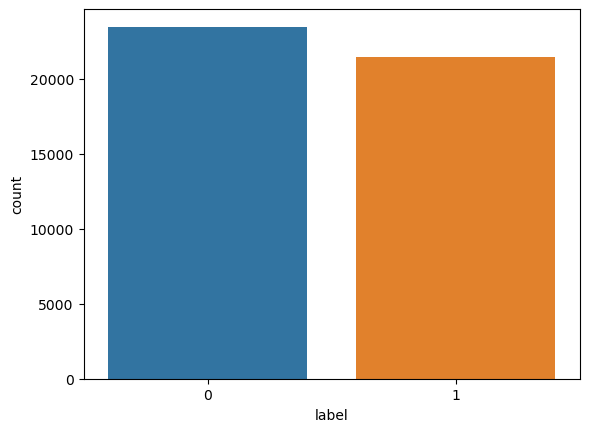

In [10]:
sns.countplot(data = df, x = 'label')

<AxesSubplot:xlabel='Year', ylabel='count'>

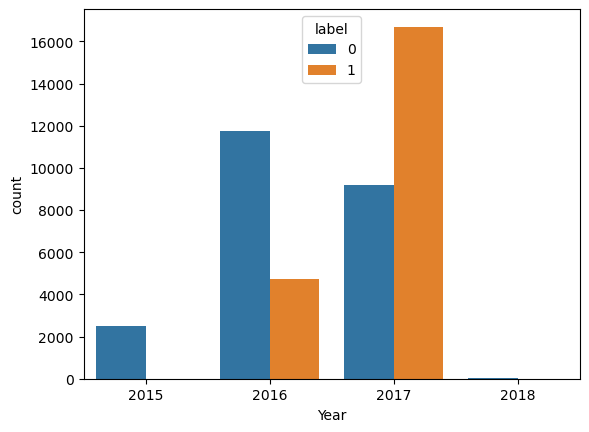

In [11]:
# Change the date column format to datetime
df['date'] = pd.to_datetime(df["date"], errors = "coerce")

# Create a new column Year 
df["Year"] = df["date"].dt.year

# Create a new column Month
df["Month"] = df["date"].dt.month

sns.countplot(data = df, x = "Year", hue = "label")

<AxesSubplot:xlabel='Month', ylabel='count'>

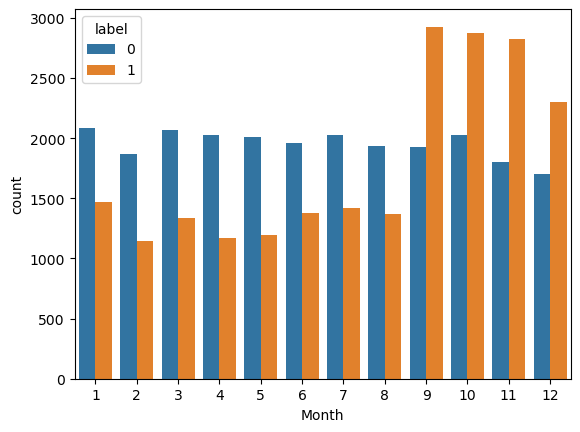

In [12]:
sns.countplot(data = df, x = "Month", hue = "label")

In [13]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6833
left-news           4454
Government News     1568
US_News              775
Middle-east          770
Name: subject, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

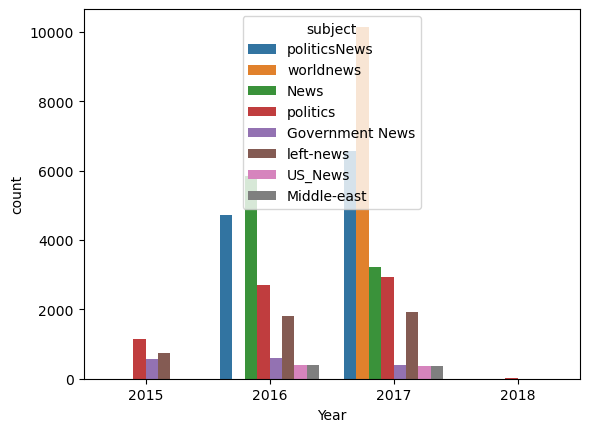

In [14]:
sns.countplot(data = df, x = "Year", hue="subject")

In [15]:
# Retrieve the first 200 data rows from each true and fake dataframe
frames = [true.head(200), fake.head(200)]

# Join the 2 dataframes that have been sliced
df = pd.concat(frames)

X = df.drop('label', axis = 1)
y = df['label']

In [16]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31/12/17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29/12/17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31/12/17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30/12/17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29/12/17,1


In [17]:
X.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31/12/17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29/12/17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31/12/17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30/12/17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29/12/17


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [19]:
df.tail()

,title,text,subject,date,label
195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,23/10/17,0
196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,22/10/17,0
197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,21/10/17,0
198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,21/10/17,0
199,"Trump Takes Credit For Releasing JFK Files, B...","Saturday morning, Trump was going through his ...",News,21/10/17,0


In [20]:
# Remove missing values (if any)
df = df.dropna()

df2 = df.copy()
df2.reset_index(inplace = True)

df2.tail()

,index,title,text,subject,date,label
395,195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,23/10/17,0
396,196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,22/10/17,0
397,197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,21/10/17,0
398,198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,21/10/17,0
399,199,"Trump Takes Credit For Releasing JFK Files, B...","Saturday morning, Trump was going through his ...",News,21/10/17,0


In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()

# initialize an empty list to store data after the text is processed
corpus = []

for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhafr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus

['washington reuter head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meadow among republican vote late decemb parti 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(corpus).toarray()

y = df2['label']

# List that stores vectorized data
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

print("accuracy: %0.3f" % score)

accuracy: 0.950


Text(0.5, 1.0, 'Confusion Matrix')

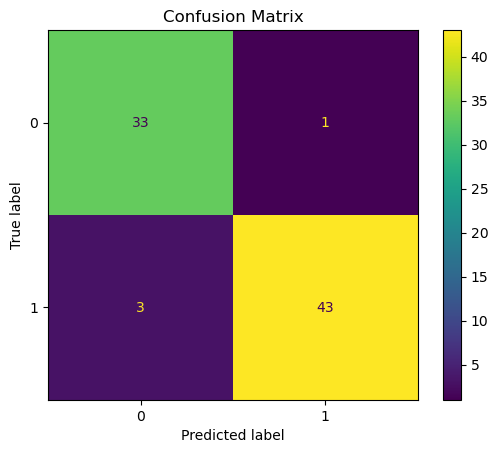

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")

In [27]:
import pickle

pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [28]:
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [29]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

In [30]:
text = "Former CIA Openly Suggests He's Like A Dictator"
prediction = predict(text)

print(prediction)

FAKE


In [31]:
text = "Lindsey Graham Trashes Media For Portraying Trump As 'Cocky'"
prediction = predict(text)

print(prediction)

FAKE


In [32]:
text = "Hillary Clinton, Tax Cut Bill"
prediction = predict(text)

print(prediction)

REAL


In [33]:
text = "Republicans aim to ride economy to election victory"
prediction = predict(text)

print(prediction)

REAL


In [34]:
text = "Trump Says He’s Done More Than Any President Ever"
prediction = predict(text)

print(prediction)

FAKE
